In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mutspec_utils.annotation import rev_comp, transcriptor

In [2]:
df = pd.read_csv("../data/external/MutSpecVertebratescytb.csv")
df.head()

,Species,Mut,Expected,Observed,RawMutSpec,RawMutSpecSum,MutSpec,MutBase,Context,Class
0,Abbottina_obtusirostris,T[T>G]T,0.0,0.0,0.0,1.088889,0.0,T>G,TTT,Actinopterygii
1,Abbottina_obtusirostris,G[T>G]T,0.0,0.0,0.0,1.088889,0.0,T>G,GTT,Actinopterygii
2,Abbottina_obtusirostris,C[T>G]T,0.0,0.0,0.0,1.088889,0.0,T>G,CTT,Actinopterygii
3,Abbottina_obtusirostris,A[T>G]T,0.0,0.0,0.0,1.088889,0.0,T>G,ATT,Actinopterygii
4,Abbottina_obtusirostris,T[T>C]T,8.0,0.0,0.0,1.088889,0.0,T>C,TTT,Actinopterygii


In [3]:
df["Label"] = df.Class + "-" + df.Species
df["Mutation Types"] = df.Mut

In [24]:
ms192 = df.pivot(columns="Label", index="Mutation Types", values="MutSpec").reset_index()
ms192.to_csv("../data/vertebrata192.tsv", index=None, sep="\t")
ms192.columns.name = None

In [25]:
ms192

,Mutation Types,Actinopterygii-Abbottina_obtusirostris,Actinopterygii-Abbottina_rivularis,Actinopterygii-Abramis_brama,Actinopterygii-Acanthogobius_hasta,Actinopterygii-Acanthopagrus_latus,Actinopterygii-Acanthopagrus_schlegelii,Actinopterygii-Acheilognathus_macropterus,Actinopterygii-Acheilognathus_rhombeus,Actinopterygii-Acheilognathus_signifer,Actinopterygii-Acheilognathus_somjinensis,Actinopterygii-Acheilognathus_typus,Actinopterygii-Acheilognathus_yamatsutae,Actinopterygii-Acipenser_gueldenstaedtii,Actinopterygii-Acipenser_schrenckii,Actinopterygii-Acipenser_stellatus,Actinopterygii-Acrossocheilus_beijiangensis,Actinopterygii-Acrossocheilus_parallens,Actinopterygii-Acrossocheilus_yunnanensis,Actinopterygii-Agonostomus_monticola,Actinopterygii-Alburnus_alburnus,Actinopterygii-Ambloplites_rupestris,Actinopterygii-Amphilophus_citrinellus,Actinopterygii-Amphiprion_akallopisos,Actinopterygii-Amphiprion_clarkii,Actinopterygii-Amphiprion_frenatus,Actinopterygii-Amphiprion_ocellaris,Actinopterygii-Anabas_testudineus,Actinopterygii-Anarhichas_lupus,Actinopterygii-Anguilla_anguilla,Actinopterygii-Anguilla_australis_australis,Actinopterygii-Anguilla_australis_schmidti,Actinopterygii-Anguilla_bicolor_bicolor,Actinopterygii-Anguilla_bicolor_pacifica,Actinopterygii-Anguilla_celebesensis,Actinopterygii-Anguilla_japonica,Actinopterygii-Anguilla_luzonensis,Actinopterygii-Anguilla_malgumora,Actinopterygii-Anguilla_marmorata,Actinopterygii-Anguilla_mossambica,...,Mammalia-Sturnira_tildae,Mammalia-Suncus_murinus,Mammalia-Sus_barbatus,Mammalia-Sus_celebensis,Mammalia-Sus_scrofa,Mammalia-Sus_scrofa_domesticus,Mammalia-Symphalangus_syndactylus,Mammalia-Tamandua_tetradactyla,Mammalia-Tamias_dorsalis,Mammalia-Tamias_sibiricus,Mammalia-Tamias_striatus,Mammalia-Tamiops_maritimus,Mammalia-Tamiops_swinhoei,Mammalia-Tapirus_indicus,Mammalia-Tarsius_dentatus,Mammalia-Tarsius_lariang,Mammalia-Tarsius_wallacei,Mammalia-Thylamys_elegans,Mammalia-Tonatia_saurophila,Mammalia-Trachypithecus_phayrei,Mammalia-Tragelaphus_imberbis,Mammalia-Tragelaphus_scriptus,Mammalia-Tupaia_belangeri,Mammalia-Tursiops_aduncus,Mammalia-Tursiops_truncatus,Mammalia-Urocitellus_parryii,Mammalia-Urocyon_cinereoargenteus,Mammalia-Uropsilus_soricipes,Mammalia-Urotrichus_talpoides,Mammalia-Ursus_americanus,Mammalia-Ursus_arctos,Mammalia-Ursus_maritimus,Mammalia-Ursus_thibetanus,Mammalia-Ursus_thibetanus_ussuricus,Mammalia-Varecia_variegata,Mammalia-Vespertilio_sinensis,Mammalia-Vicugna_vicugna,Mammalia-Viverricula_indica,Mammalia-Vulpes_lagopus,Mammalia-Vulpes_vulpes
0,A[A>C]A,0.0,0.000000,0.0,0.0,0.0,0.010455,0.002856,0.000000,0.006560,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,A[A>C]C,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.011136,0.0,...,0.0,0.000000,0.000000,0.000000,0.005203,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.117133,0.000000,0.000000,0.000000,0.000000,0.000000
2,A[A>C]G,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.

In [26]:
order = pd.read_csv("../data/ms96.tsv", sep="\t")["Mutation Types"].values

In [27]:
ms192["is_cosmic"] = ms192["Mutation Types"].isin(order)

In [28]:
ms192["Mutation Types96"] = ms192.apply(lambda row: rev_comp(row["Mutation Types"]) if row.is_cosmic else row["Mutation Types"], axis=1)

In [58]:
ms96 = ms192.groupby("Mutation Types96").sum().reset_index().drop("is_cosmic", axis=1)

In [59]:
ms96

,Mutation Types96,Actinopterygii-Abbottina_obtusirostris,Actinopterygii-Abbottina_rivularis,Actinopterygii-Abramis_brama,Actinopterygii-Acanthogobius_hasta,Actinopterygii-Acanthopagrus_latus,Actinopterygii-Acanthopagrus_schlegelii,Actinopterygii-Acheilognathus_macropterus,Actinopterygii-Acheilognathus_rhombeus,Actinopterygii-Acheilognathus_signifer,Actinopterygii-Acheilognathus_somjinensis,Actinopterygii-Acheilognathus_typus,Actinopterygii-Acheilognathus_yamatsutae,Actinopterygii-Acipenser_gueldenstaedtii,Actinopterygii-Acipenser_schrenckii,Actinopterygii-Acipenser_stellatus,Actinopterygii-Acrossocheilus_beijiangensis,Actinopterygii-Acrossocheilus_parallens,Actinopterygii-Acrossocheilus_yunnanensis,Actinopterygii-Agonostomus_monticola,Actinopterygii-Alburnus_alburnus,Actinopterygii-Ambloplites_rupestris,Actinopterygii-Amphilophus_citrinellus,Actinopterygii-Amphiprion_akallopisos,Actinopterygii-Amphiprion_clarkii,Actinopterygii-Amphiprion_frenatus,Actinopterygii-Amphiprion_ocellaris,Actinopterygii-Anabas_testudineus,Actinopterygii-Anarhichas_lupus,Actinopterygii-Anguilla_anguilla,Actinopterygii-Anguilla_australis_australis,Actinopterygii-Anguilla_australis_schmidti,Actinopterygii-Anguilla_bicolor_bicolor,Actinopterygii-Anguilla_bicolor_pacifica,Actinopterygii-Anguilla_celebesensis,Actinopterygii-Anguilla_japonica,Actinopterygii-Anguilla_luzonensis,Actinopterygii-Anguilla_malgumora,Actinopterygii-Anguilla_marmorata,Actinopterygii-Anguilla_mossambica,...,Mammalia-Sturnira_tildae,Mammalia-Suncus_murinus,Mammalia-Sus_barbatus,Mammalia-Sus_celebensis,Mammalia-Sus_scrofa,Mammalia-Sus_scrofa_domesticus,Mammalia-Symphalangus_syndactylus,Mammalia-Tamandua_tetradactyla,Mammalia-Tamias_dorsalis,Mammalia-Tamias_sibiricus,Mammalia-Tamias_striatus,Mammalia-Tamiops_maritimus,Mammalia-Tamiops_swinhoei,Mammalia-Tapirus_indicus,Mammalia-Tarsius_dentatus,Mammalia-Tarsius_lariang,Mammalia-Tarsius_wallacei,Mammalia-Thylamys_elegans,Mammalia-Tonatia_saurophila,Mammalia-Trachypithecus_phayrei,Mammalia-Tragelaphus_imberbis,Mammalia-Tragelaphus_scriptus,Mammalia-Tupaia_belangeri,Mammalia-Tursiops_aduncus,Mammalia-Tursiops_truncatus,Mammalia-Urocitellus_parryii,Mammalia-Urocyon_cinereoargenteus,Mammalia-Uropsilus_soricipes,Mammalia-Urotrichus_talpoides,Mammalia-Ursus_americanus,Mammalia-Ursus_arctos,Mammalia-Ursus_maritimus,Mammalia-Ursus_thibetanus,Mammalia-Ursus_thibetanus_ussuricus,Mammalia-Varecia_variegata,Mammalia-Vespertilio_sinensis,Mammalia-Vicugna_vicugna,Mammalia-Viverricula_indica,Mammalia-Vulpes_lagopus,Mammalia-Vulpes_vulpes
0,A[A>C]A,0.0,0.000000,0.00000,0.0,0.0,0.010455,0.002856,0.000000,0.006560,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,A[A>C]C,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.011136,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005203,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.117133,0.000000,0.000000,0.000000,0.000000,0.000000
2,A[A>C]G,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000

In [60]:
ms192[ms192["Mutation Types96"] == "T[G>T]A"]

,Mutation Types,Actinopterygii-Abbottina_obtusirostris,Actinopterygii-Abbottina_rivularis,Actinopterygii-Abramis_brama,Actinopterygii-Acanthogobius_hasta,Actinopterygii-Acanthopagrus_latus,Actinopterygii-Acanthopagrus_schlegelii,Actinopterygii-Acheilognathus_macropterus,Actinopterygii-Acheilognathus_rhombeus,Actinopterygii-Acheilognathus_signifer,Actinopterygii-Acheilognathus_somjinensis,Actinopterygii-Acheilognathus_typus,Actinopterygii-Acheilognathus_yamatsutae,Actinopterygii-Acipenser_gueldenstaedtii,Actinopterygii-Acipenser_schrenckii,Actinopterygii-Acipenser_stellatus,Actinopterygii-Acrossocheilus_beijiangensis,Actinopterygii-Acrossocheilus_parallens,Actinopterygii-Acrossocheilus_yunnanensis,Actinopterygii-Agonostomus_monticola,Actinopterygii-Alburnus_alburnus,Actinopterygii-Ambloplites_rupestris,Actinopterygii-Amphilophus_citrinellus,Actinopterygii-Amphiprion_akallopisos,Actinopterygii-Amphiprion_clarkii,Actinopterygii-Amphiprion_frenatus,Actinopterygii-Amphiprion_ocellaris,Actinopterygii-Anabas_testudineus,Actinopterygii-Anarhichas_lupus,Actinopterygii-Anguilla_anguilla,Actinopterygii-Anguilla_australis_australis,Actinopterygii-Anguilla_australis_schmidti,Actinopterygii-Anguilla_bicolor_bicolor,Actinopterygii-Anguilla_bicolor_pacifica,Actinopterygii-Anguilla_celebesensis,Actinopterygii-Anguilla_japonica,Actinopterygii-Anguilla_luzonensis,Actinopterygii-Anguilla_malgumora,Actinopterygii-Anguilla_marmorata,Actinopterygii-Anguilla_mossambica,...,Mammalia-Sus_barbatus,Mammalia-Sus_celebensis,Mammalia-Sus_scrofa,Mammalia-Sus_scrofa_domesticus,Mammalia-Symphalangus_syndactylus,Mammalia-Tamandua_tetradactyla,Mammalia-Tamias_dorsalis,Mammalia-Tamias_sibiricus,Mammalia-Tamias_striatus,Mammalia-Tamiops_maritimus,Mammalia-Tamiops_swinhoei,Mammalia-Tapirus_indicus,Mammalia-Tarsius_dentatus,Mammalia-Tarsius_lariang,Mammalia-Tarsius_wallacei,Mammalia-Thylamys_elegans,Mammalia-Tonatia_saurophila,Mammalia-Trachypithecus_phayrei,Mammalia-Tragelaphus_imberbis,Mammalia-Tragelaphus_scriptus,Mammalia-Tupaia_belangeri,Mammalia-Tursiops_aduncus,Mammalia-Tursiops_truncatus,Mammalia-Urocitellus_parryii,Mammalia-Urocyon_cinereoargenteus,Mammalia-Uropsilus_soricipes,Mammalia-Urotrichus_talpoides,Mammalia-Ursus_americanus,Mammalia-Ursus_arctos,Mammalia-Ursus_maritimus,Mammalia-Ursus_thibetanus,Mammalia-Ursus_thibetanus_ussuricus,Mammalia-Varecia_variegata,Mammalia-Vespertilio_sinensis,Mammalia-Vicugna_vicugna,Mammalia-Viverricula_indica,Mammalia-Vulpes_lagopus,Mammalia-Vulpes_vulpes,is_cosmic,Mutation Types96
156,T[C>A]A,0.0,0.009895,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0189,0.0,0.0,0.000000,True,T[G>T]A
176,T[G>T]A,0.0,0.006361,0.0,0.0,0.0,0.006273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018505,0.0,0.272914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003191,0.007759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036683,0.005468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.018445,False,T[G>T]A


In [61]:
ms96[ms96["Mutation Types96"] == "T[G>T]A"]

,Mutation Types96,Actinopterygii-Abbottina_obtusirostris,Actinopterygii-Abbottina_rivularis,Actinopterygii-Abramis_brama,Actinopterygii-Acanthogobius_hasta,Actinopterygii-Acanthopagrus_latus,Actinopterygii-Acanthopagrus_schlegelii,Actinopterygii-Acheilognathus_macropterus,Actinopterygii-Acheilognathus_rhombeus,Actinopterygii-Acheilognathus_signifer,Actinopterygii-Acheilognathus_somjinensis,Actinopterygii-Acheilognathus_typus,Actinopterygii-Acheilognathus_yamatsutae,Actinopterygii-Acipenser_gueldenstaedtii,Actinopterygii-Acipenser_schrenckii,Actinopterygii-Acipenser_stellatus,Actinopterygii-Acrossocheilus_beijiangensis,Actinopterygii-Acrossocheilus_parallens,Actinopterygii-Acrossocheilus_yunnanensis,Actinopterygii-Agonostomus_monticola,Actinopterygii-Alburnus_alburnus,Actinopterygii-Ambloplites_rupestris,Actinopterygii-Amphilophus_citrinellus,Actinopterygii-Amphiprion_akallopisos,Actinopterygii-Amphiprion_clarkii,Actinopterygii-Amphiprion_frenatus,Actinopterygii-Amphiprion_ocellaris,Actinopterygii-Anabas_testudineus,Actinopterygii-Anarhichas_lupus,Actinopterygii-Anguilla_anguilla,Actinopterygii-Anguilla_australis_australis,Actinopterygii-Anguilla_australis_schmidti,Actinopterygii-Anguilla_bicolor_bicolor,Actinopterygii-Anguilla_bicolor_pacifica,Actinopterygii-Anguilla_celebesensis,Actinopterygii-Anguilla_japonica,Actinopterygii-Anguilla_luzonensis,Actinopterygii-Anguilla_malgumora,Actinopterygii-Anguilla_marmorata,Actinopterygii-Anguilla_mossambica,...,Mammalia-Sturnira_tildae,Mammalia-Suncus_murinus,Mammalia-Sus_barbatus,Mammalia-Sus_celebensis,Mammalia-Sus_scrofa,Mammalia-Sus_scrofa_domesticus,Mammalia-Symphalangus_syndactylus,Mammalia-Tamandua_tetradactyla,Mammalia-Tamias_dorsalis,Mammalia-Tamias_sibiricus,Mammalia-Tamias_striatus,Mammalia-Tamiops_maritimus,Mammalia-Tamiops_swinhoei,Mammalia-Tapirus_indicus,Mammalia-Tarsius_dentatus,Mammalia-Tarsius_lariang,Mammalia-Tarsius_wallacei,Mammalia-Thylamys_elegans,Mammalia-Tonatia_saurophila,Mammalia-Trachypithecus_phayrei,Mammalia-Tragelaphus_imberbis,Mammalia-Tragelaphus_scriptus,Mammalia-Tupaia_belangeri,Mammalia-Tursiops_aduncus,Mammalia-Tursiops_truncatus,Mammalia-Urocitellus_parryii,Mammalia-Urocyon_cinereoargenteus,Mammalia-Uropsilus_soricipes,Mammalia-Urotrichus_talpoides,Mammalia-Ursus_americanus,Mammalia-Ursus_arctos,Mammalia-Ursus_maritimus,Mammalia-Ursus_thibetanus,Mammalia-Ursus_thibetanus_ussuricus,Mammalia-Varecia_variegata,Mammalia-Vespertilio_sinensis,Mammalia-Vicugna_vicugna,Mammalia-Viverricula_indica,Mammalia-Vulpes_lagopus,Mammalia-Vulpes_vulpes
92,T[G>T]A,0.0,0.016256,0.0,0.0,0.0,0.006273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018505,0.0,0.272914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003191,0.007759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036683,0.005468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0189,0.0,0.0,0.018445


<AxesSubplot:>

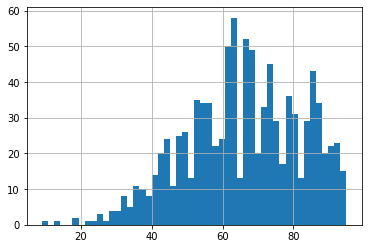

In [62]:
d = (ms96.set_index("Mutation Types96") == 0).sum()
d.hist(bins=50)

In [63]:
ms96 = ms96[["Mutation Types96"] + list(d[d > 40].index)]\
    .rename(columns={"Mutation Types96": "Mutation Types"})

ms96.to_csv("../data/vertebrata96.tsv", index=None, sep="\t")

In [64]:
ms96

,Mutation Types,Actinopterygii-Abbottina_obtusirostris,Actinopterygii-Abbottina_rivularis,Actinopterygii-Abramis_brama,Actinopterygii-Acanthogobius_hasta,Actinopterygii-Acanthopagrus_latus,Actinopterygii-Acheilognathus_macropterus,Actinopterygii-Acheilognathus_rhombeus,Actinopterygii-Acheilognathus_signifer,Actinopterygii-Acheilognathus_somjinensis,Actinopterygii-Acheilognathus_typus,Actinopterygii-Acheilognathus_yamatsutae,Actinopterygii-Acipenser_gueldenstaedtii,Actinopterygii-Acipenser_schrenckii,Actinopterygii-Acipenser_stellatus,Actinopterygii-Acrossocheilus_beijiangensis,Actinopterygii-Acrossocheilus_parallens,Actinopterygii-Acrossocheilus_yunnanensis,Actinopterygii-Alburnus_alburnus,Actinopterygii-Ambloplites_rupestris,Actinopterygii-Amphilophus_citrinellus,Actinopterygii-Amphiprion_akallopisos,Actinopterygii-Amphiprion_clarkii,Actinopterygii-Amphiprion_frenatus,Actinopterygii-Amphiprion_ocellaris,Actinopterygii-Anabas_testudineus,Actinopterygii-Anarhichas_lupus,Actinopterygii-Anguilla_anguilla,Actinopterygii-Anguilla_australis_australis,Actinopterygii-Anguilla_australis_schmidti,Actinopterygii-Anguilla_bicolor_bicolor,Actinopterygii-Anguilla_bicolor_pacifica,Actinopterygii-Anguilla_celebesensis,Actinopterygii-Anguilla_japonica,Actinopterygii-Anguilla_luzonensis,Actinopterygii-Anguilla_malgumora,Actinopterygii-Anguilla_marmorata,Actinopterygii-Anguilla_mossambica,Actinopterygii-Anguilla_rostrata,Actinopterygii-Aphanopus_carbo,...,Mammalia-Sturnira_tildae,Mammalia-Suncus_murinus,Mammalia-Sus_barbatus,Mammalia-Sus_celebensis,Mammalia-Sus_scrofa,Mammalia-Sus_scrofa_domesticus,Mammalia-Symphalangus_syndactylus,Mammalia-Tamandua_tetradactyla,Mammalia-Tamias_dorsalis,Mammalia-Tamias_sibiricus,Mammalia-Tamias_striatus,Mammalia-Tamiops_maritimus,Mammalia-Tamiops_swinhoei,Mammalia-Tapirus_indicus,Mammalia-Tarsius_dentatus,Mammalia-Tarsius_lariang,Mammalia-Tarsius_wallacei,Mammalia-Thylamys_elegans,Mammalia-Tonatia_saurophila,Mammalia-Trachypithecus_phayrei,Mammalia-Tragelaphus_imberbis,Mammalia-Tragelaphus_scriptus,Mammalia-Tupaia_belangeri,Mammalia-Tursiops_aduncus,Mammalia-Tursiops_truncatus,Mammalia-Urocitellus_parryii,Mammalia-Urocyon_cinereoargenteus,Mammalia-Uropsilus_soricipes,Mammalia-Urotrichus_talpoides,Mammalia-Ursus_americanus,Mammalia-Ursus_arctos,Mammalia-Ursus_maritimus,Mammalia-Ursus_thibetanus,Mammalia-Ursus_thibetanus_ussuricus,Mammalia-Varecia_variegata,Mammalia-Vespertilio_sinensis,Mammalia-Vicugna_vicugna,Mammalia-Viverricula_indica,Mammalia-Vulpes_lagopus,Mammalia-Vulpes_vulpes
0,A[A>C]A,0.0,0.000000,0.00000,0.0,0.0,0.002856,0.000000,0.006560,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,A[A>C]C,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.011136,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005203,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.117133,0.000000,0.000000,0.000000,0.000000,0.000000
2,A[A>C]G,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.

Asymmetry

drop is_cosmic and assign heavy and light by custom splitting

miltiply by min num in spectra to simulate real mutations

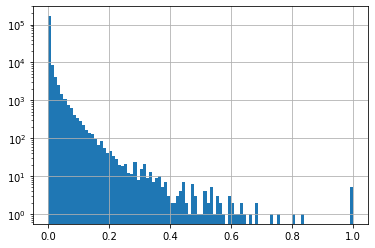

In [74]:
df.MutSpec.hist(bins=100)
plt.yscale("log")

In [69]:
df = pd.read_csv("../data/external/MutSpecVertebratescytb.csv")
df["is_cosmic"] = df["Mut"].isin(order).map({True: "h", False: "l"})
df["Label"] = df.Class + "-" + df.Species
df["Mutation Types"] = df.Mut
df

,Species,Mut,Expected,Observed,RawMutSpec,RawMutSpecSum,MutSpec,MutBase,Context,Class,is_cosmic,Label,Mutation Types
0,Abbottina_obtusirostris,T[T>G]T,0.0,0.0,0.0,1.088889,0.000000,T>G,TTT,Actinopterygii,h,Actinopterygii-Abbottina_obtusirostris,T[T>G]T
1,Abbottina_obtusirostris,G[T>G]T,0.0,0.0,0.0,1.088889,0.000000,T>G,GTT,Actinopterygii,h,Actinopterygii-Abbottina_obtusirostris,G[T>G]T
2,Abbottina_obtusirostris,C[T>G]T,0.0,0.0,0.0,1.088889,0.000000,T>G,CTT,Actinopterygii,h,Actinopterygii-Abbottina_obtusirostris,C[T>G]T
3,Abbottina_obtusirostris,A[T>G]T,0.0,0.0,0.0,1.088889,0.000000,T>G,ATT,Actinopterygii,h,Actinopterygii-Abbottina_obtusirostris,A[T>G]T
4,Abbottina_obtusirostris,T[T>C]T,8.0,0.0,0.0,1.088889,0.000000,T>C,TTT,Actinopterygii,h,Actinopterygii-Abbottina_obtusirostris,T[T>C]T
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187003,Zosterops_japonicus,A[A>G]A,3.0,3.0,1.0,15.981840,0.062571,A>G,AAA,Aves,l,Aves-Zosterops_japonicus,A[A>G]A
187004,Zosterops_japonicus,T[A>C]A,1.0,0.0,0.0,15.981840,0.000000,A>C,TAA,Aves,l,Aves-Zosterops_japonicus,T[A>C]A
187005,Zosterops_japonicus,G[A>C]A,5.0,0.0,0.0,15.981840,0.000000,A>C,GAA,Aves,l,Aves-Zosterops_japonicus,G[A>C]A
187006,Zosterops_japonicus,C[A>C]A,4.0,0.0,0.0,15.981840,0.000000,A>C,CAA,Aves,l,Aves-Zosterops_japonicus,C[A>C]A


In [ ]:
ms192 = df.pivot(columns="Label", index="Mutation Types", values="MutSpec").reset_index()
ms192.to_csv("../data/vertebrata192.tsv", index=None, sep="\t")
ms192.columns.name = None
ms192
order = pd.read_csv("../data/ms96.tsv", sep="\t")["Mutation Types"].values
ms192["Mutation Types96"] = ms192.apply(lambda row: rev_comp(row["Mutation Types"]) if row.is_cosmic else row["Mutation Types"], axis=1)
ms96 = ms192.groupby("Mutation Types96").sum().reset_index().drop("is_cosmic", axis=1)